<a href="https://colab.research.google.com/github/ZachMckennedyFWig/DSPS_ZMckennedy/blob/main/HW8/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Code to Recreate Bad Plot:

(From HW5)

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.linear_model import LinearRegression
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read in the Data
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv")
grbAG.head()

# Convert time to log time to linearize
grbAG['logtime'] = np.log10(grbAG['time'])

In [3]:
def plotlogtime(df, models=[]):
  #create a figure container and an axis object inside of it
  ax = pl.figure(figsize=(10,10)).add_subplot(111)

  #loop on every filter to plot - this will give differnt colors naturally.
  #Use pl.errorbar to plot the uncertainties

  for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

  # replot to add a better marker (optional)
  for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


  # plot the upperlimits as arrows
  nuplim = grbAG.mag.isna().sum()
  for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].mag, 0, 0.5, head_width=0.1,
             overhang=1, shape="full",
             head_length=0.1, ec='#555555', visible=True)

  # I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
  pl.ylim(24,11.7)
  pl.legend()

  #Always rememebr you axis labels!!
  pl.ylabel("magnitude", fontsize=20)
  pl.xlabel("log time", fontsize=20)
  return ax

<Axes: xlabel='log time', ylabel='magnitude'>

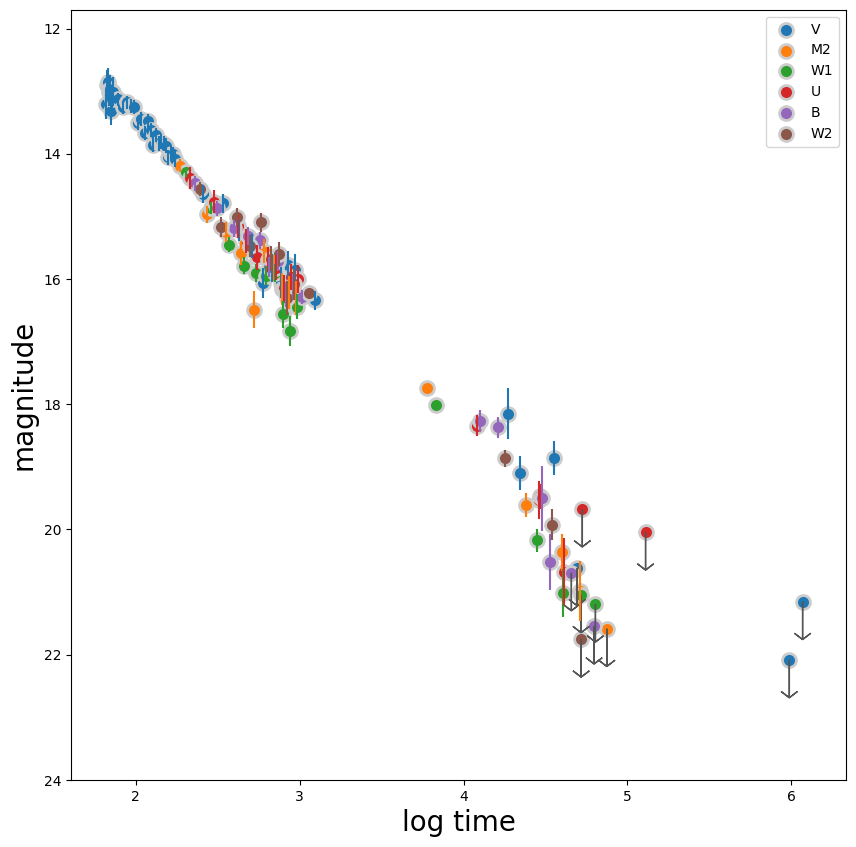

In [4]:
plotlogtime(grbAG)

**Figure 1:** Photometry of the Afterglow of GRB 052505A. All photometry is from the Swift satellite and it is obtained from Table 3 of Blustin et al. 2005 https://arxiv.org/pdf/astro-ph/0507515.pdf. The photometric band for each datapoint is indicated in the legend. Time is relative from the estimated moment of explosion of the stellar progenitor. Upperlimits are indicated by down-pointing arrows.

This is a poor example of a plot because of the formatting creating ugly and unclear data. The colors of the points seem a little ambiguous, since they weren't specified, and since the data is so tightly packed the points overlap each other with full opacity. On top of this, the axis labels don't specify units. To fix this I am going to rewrite the plotting function to correct all these issues.

In [ ]:
# Read in the Data
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv")
grbAG.head()

# Don't convert time to log time to linearize
grbAG['logtime'] = grbAG['time']

In [33]:
# Using a qualitative color scheme for the points:
colors = ['#e41a1c',
          '#377eb8',
          '#4daf4a',
          '#984ea3',
          '#a65628',
          '#f781bf']

def plotlogtime2(df, models=[]):
  #create a figure container and an axis object inside of it
  ax = pl.figure(figsize=(15,10)).add_subplot(111)

  #loop on every filter to plot - this will give differnt colors naturally.
  #Use pl.errorbar to plot the uncertainties

  for i, f in enumerate(grbAG["filter"].unique()):
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None,
                ecolor=colors[i], alpha=0.5)

  # replot to add a better marker (optional)
  for i, f in enumerate(grbAG["filter"].unique()):
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=0.25, s=90, linewidth=2, c=colors[i])

  # plot the upperlimits as arrows
  nuplim = grbAG.mag.isna().sum()
  for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].mag, 0, 0.5, head_width=0.1,
             overhang=1, shape="full",
             head_length=0.1, ec='#555555', visible=True)

  # I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
  pl.ylim(24,11.7)
  pl.legend(['V filter', 'UVM2 filter', 'UVW1 filter', 'U filter', 'B filter', 'UVW2 filter'])

  #Always rememebr you axis labels!!
  pl.ylabel("Magnitude", fontsize=20)
  pl.xlabel("Time [seconds]", fontsize=20)
  pl.xscale('log')

  pl.title('Photometry of the Afterglow of GRB 052505A', fontsize=30)

  return ax

<Axes: title={'center': 'Photometry of the Afterglow of GRB 052505A'}, xlabel='Time [seconds]', ylabel='Magnitude'>

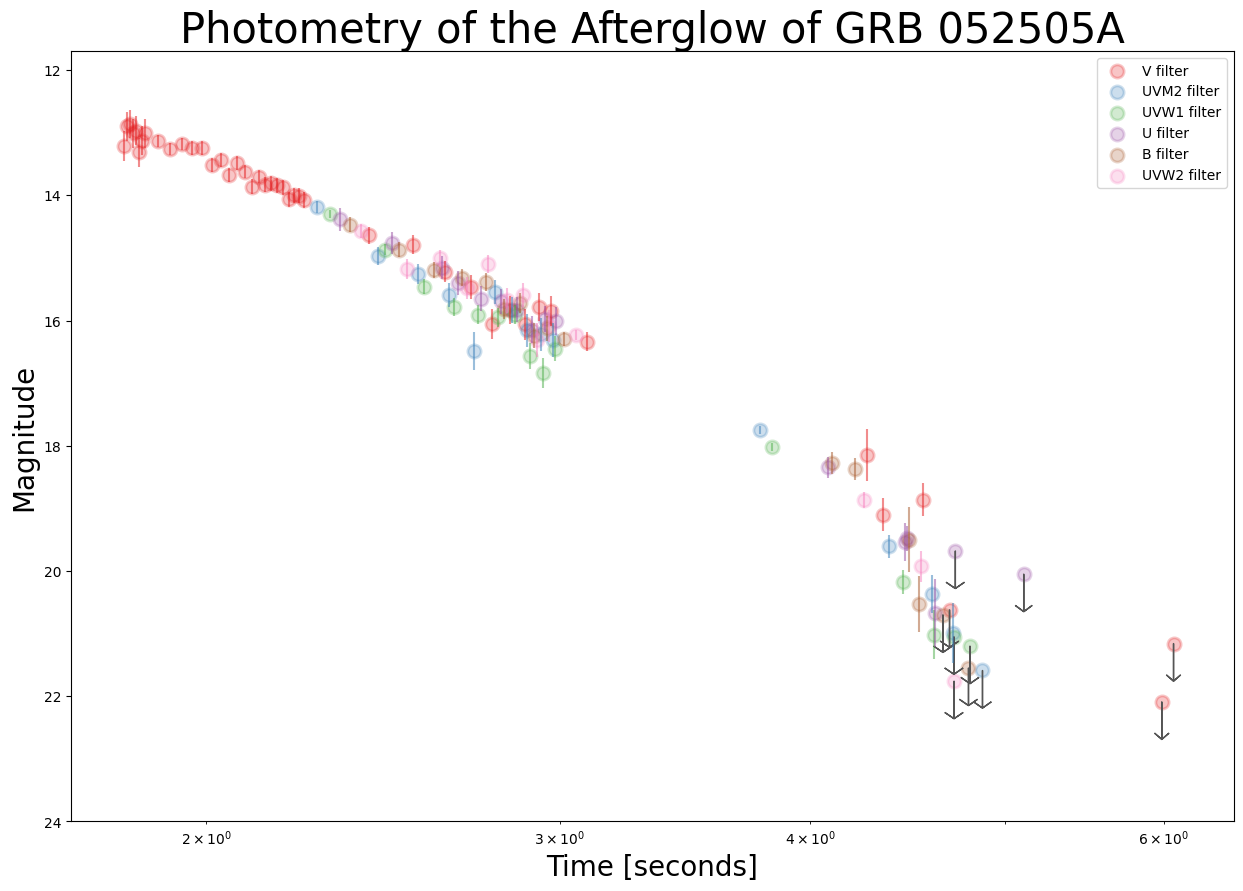

In [34]:
plotlogtime2(grbAG)

**Figure 1:** Photometry of the Afterglow of GRB 052505A. All photometry is from the Swift satellite and it is obtained from Table 3 of Blustin et al. 2005 https://arxiv.org/pdf/astro-ph/0507515.pdf. The photometric band filter for each datapoint is indicated in the legend. Time is relative from the estimated moment of explosion of the stellar progenitor. Upperlimits are indicated by down-pointing arrows.